# Importing numpy, pandas, sklearn, matplotlib, tensorflow

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Load the MNIST dataset

In [87]:

def load_mnist_from_csv():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(url, header=None)
    # Extract features (pixel values) and labels from the DataFrame
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

# Step 2: Preprocess the data

In [88]:

def preprocess_mnist(X, y):
    # Normalize pixel values
    X = X / 16.0  # Pixel values range from 0 to 16
    # Reshape images to 8x8 (as the original dataset contains flattened 8x8 images)
    X = X.reshape(-1, 8, 8, 1)
    return X, y

# Load the dataset

In [89]:

X, y = load_mnist_from_csv()

# Preprocess the data

In [90]:

X, y = preprocess_mnist(X, y)

# K-Fold Cross Validation

In [91]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation results

In [92]:

accuracy_scores = []
conf_matrices = []

# Iterate over K-Fold splits

In [93]:

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


# Define the CNN architecture

In [94]:

model = Sequential([
    # Convolutional Layer 1
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1), padding='same'),
    # Max Pooling Layer 1
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 2
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Max Pooling Layer 2
    MaxPooling2D(pool_size=(2, 2)),
    # Convolutional Layer 3
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    # Flatten layer
    Flatten(),
    # Fully connected layer
    Dense(units=128, activation='relu'),
    # Output layer
    Dense(units=10, activation='softmax')
])

# Compile the model

In [95]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model

In [96]:

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/10
96/96 [==============================] - 2s 13ms/step - loss: 1.0923 - accuracy: 0.6692 - val_loss: 0.2635 - val_accuracy: 0.9346
Epoch 2/10
96/96 [==============================] - 1s 11ms/step - loss: 0.1983 - accuracy: 0.9415 - val_loss: 0.1396 - val_accuracy: 0.9568
Epoch 3/10
96/96 [==============================] - 1s 11ms/step - loss: 0.1309 - accuracy: 0.9614 - val_loss: 0.0783 - val_accuracy: 0.9751
Epoch 4/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0912 - accuracy: 0.9706 - val_loss: 0.0790 - val_accuracy: 0.9738
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0782 - accuracy: 0.9774 - val_loss: 0.0935 - val_accuracy: 0.9647
Epoch 6/10
96/96 [==============================] - 1s 11ms/step - loss: 0.0647 - accuracy: 0.9791 - val_loss: 0.0743 - val_accuracy: 0.9738
Epoch 7/10
96/96 [==============================] - 2s 16ms/step - loss: 0.0518 - accuracy: 0.9833 - val_loss: 0.0486 - val_accuracy: 0.9817
Epoch 8/10
96

# Evaluate the model

In [97]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy_scores.append(test_accuracy)

24/24 [==============================] - 0s 7ms/step - loss: 0.0376 - accuracy: 0.9830
Test Loss: 0.0375683456659317
Test Accuracy: 0.9829843044281006


# Confusion matrix

In [99]:

y_pred = np.argmax(model.predict(X_test), axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrices.append(conf_matrix)

24/24 [==============================] - 0s 7ms/step


# Plot training history

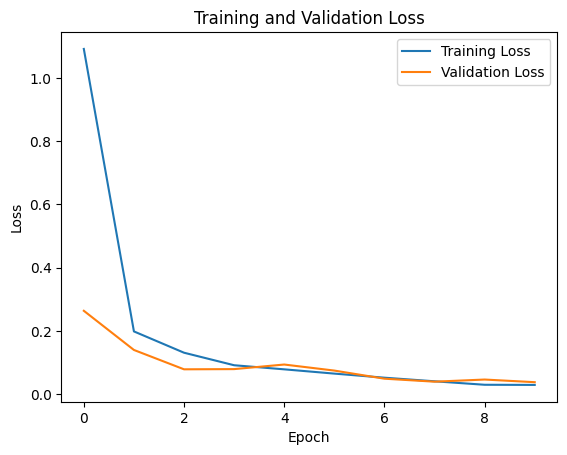

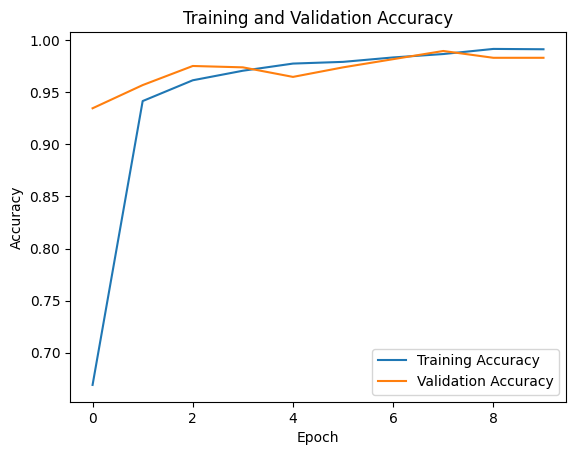

In [100]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Average accuracy across K-Fold splits

In [101]:

avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.9829843044281006


# Average confusion matrix across K-Fold splits

In [102]:

avg_conf_matrix = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:")
print(avg_conf_matrix.astype(int))

Average Confusion Matrix:
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0  0  0]
 [ 0  0 76  0  0  0  0  0  1  0]
 [ 0  0  0 66  0  2  0  0  0  1]
 [ 0  2  0  0 81  0  1  0  0  2]
 [ 0  0  0  0  0 71  0  0  0  0]
 [ 0  0  0  0  1  0 68  0  0  0]
 [ 0  0  1  0  0  0  0 87  0  0]
 [ 0  1  0  0  0  0  0  0 80  0]
 [ 0  1  0  0  0  0  0  0  0 88]]
